<!-- System Outline
In this project, we will first make a model for predicting housing prices using Linear Regression,Decision tree regressor and Ensemble techniques. -->

# **In this project, we will first make a model for predicting housing prices using Linear Regression, Decsion tree model and Ensemble technique**

# **Imports**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **Reading our Dataset**

Task Performed
*   Reading Dataset using pandas
*   Checking Information of our Dataset
*   Checking Shape of our Dataset
*   Dropping Redundant Data
  








In [ ]:
ban = pd.read_csv('Bengaluru_House_Data (1).csv')

In [ ]:
ban.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


# **Check the missing value**
Here, In Society column 50% of data are missing. Then, society column has been dropped because of higher percentage of missing values.

In [ ]:
ban.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
ban1 = ban.drop(['availability','society'],axis=1)

In [ ]:
ban1.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [ ]:
ban1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   location    13319 non-null  object 
 2   size        13304 non-null  object 
 3   total_sqft  13320 non-null  object 
 4   bath        13247 non-null  float64
 5   balcony     12711 non-null  float64
 6   price       13320 non-null  float64
dtypes: float64(3), object(4)
memory usage: 728.6+ KB


In [ ]:
ban1.describe(include='all')

,area_type,location,size,total_sqft,bath,balcony,price
count,13320,13319,13304,13320,13247.000000,12711.000000,13320.000000
unique,4,1305,31,2117,NaN,NaN,NaN
top,Super built-up Area,Whitefield,2 BHK,1200,NaN,NaN,NaN
freq,8790,540,5199,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.692610,1.584376,112.565627
std,NaN,NaN,NaN,NaN,1.341458,0.817263,148.971674
min,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


# **Drop the mssing values**

In [ ]:
ban2 = ban1.dropna()

In [ ]:
ban2.shape

(12710, 7)

In [ ]:
ban2.describe(include='all')

,area_type,location,size,total_sqft,bath,balcony,price
count,12710,12710,12710,12710,12710.000000,12710.000000,12710.000000
unique,4,1265,27,1976,NaN,NaN,NaN
top,Super built-up Area,Whitefield,2 BHK,1200,NaN,NaN,NaN
freq,8481,514,5152,788,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.617309,1.584343,106.060778
std,NaN,NaN,NaN,NaN,1.226000,0.817287,131.766089
min,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,2.000000,1.000000,49.030000
50%,NaN,NaN,NaN,NaN,2.000000,2.000000,70.000000
75%,NaN,NaN,NaN,NaN,3.000000,2.000000,115.000000


# **Adding Frames to our DataFrame**

In [ ]:
siz = []
for i in ban2['size']:
  i.split(' ')
  siz.append(int(i[0]))
print(siz)


[2, 4, 3, 3, 2, 2, 3, 3, 4, 2, 2, 3, 2, 3, 3, 3, 2, 1, 3, 4, 3, 1, 3, 2, 3, 2, 3, 4, 3, 3, 3, 2, 2, 3, 3, 2, 3, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 6, 2, 3, 2, 4, 2, 8, 2, 2, 2, 8, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 6, 3, 2, 3, 3, 6, 3, 2, 2, 6, 2, 2, 3, 4, 2, 3, 4, 3, 2, 3, 3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 4, 3, 3, 3, 2, 2, 3, 3, 4, 4, 3, 2, 3, 2, 2, 7, 3, 3, 2, 4, 3, 2, 2, 2, 3, 3, 5, 3, 2, 2, 7, 2, 3, 3, 2, 3, 2, 2, 2, 3, 3, 4, 3, 2, 3, 4, 3, 2, 3, 3, 2, 3, 6, 1, 2, 3, 3, 3, 5, 1, 1, 2, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 4, 3, 7, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 4, 4, 3, 3, 3, 3, 2, 6, 1, 3, 3, 3, 3, 4, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 5, 2, 1, 8, 1, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 4, 2, 2, 3, 4, 3, 2, 2, 2, 4, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 4, 3, 3, 2, 3, 6, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 4, 3, 4, 2, 3, 3, 3, 2, 1, 3, 4, 3, 2, 3, 2, 3, 2, 5, 2, 2, 2, 2, 2, 2, 2, 4, 3, 4, 3, 2, 2, 3, 3, 2, 4, 2, 3, 2, 2, 4, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3, 

In [ ]:
size1 = pd.DataFrame(data=siz)

In [ ]:
size1.columns =  ['bhk']

In [ ]:
size1

,bhk
0,2
1,4
2,3
3,3
4,2
...,...
12705,3
12706,5
12707,2
12708,4


In [ ]:
ban2.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [ ]:
ban2 = pd.concat([ban2,size1],axis=1)

In [ ]:
ban2.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2.0


# **Remove outliers from bath**
Here, In Some rows number of bathrooms are very large as compared no. of bhk. and drop these outlier

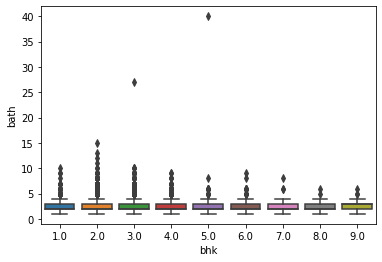

In [ ]:
sns.boxplot(x = ban2['bhk'],y= ban2['bath'])

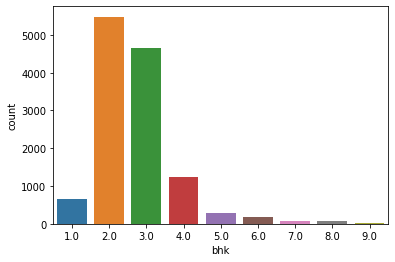

In [ ]:
sns.countplot(x='bhk',data= ban2)

In [ ]:
ban2.groupby('bhk')['balcony'].count()

bhk
1.0     634
2.0    5220
3.0    4444
4.0    1187
5.0     286
6.0     184
7.0      80
8.0      65
9.0      33
Name: balcony, dtype: int64

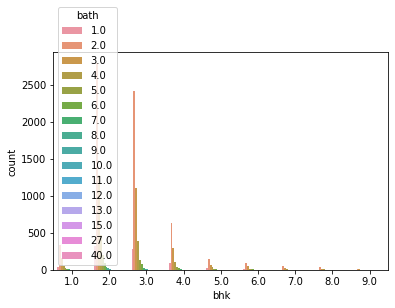

In [ ]:
sns.countplot(x = 'bhk',hue = 'bath',data = ban2)

In [ ]:
ban4=ban2[ban2.bath<ban2.bhk+2]

In [ ]:
ban4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10730 entries, 0 to 12709
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   10730 non-null  object 
 1   location    10730 non-null  object 
 2   size        10730 non-null  object 
 3   total_sqft  10730 non-null  object 
 4   bath        10730 non-null  float64
 5   balcony     10730 non-null  float64
 6   price       10730 non-null  float64
 7   bhk         10730 non-null  float64
dtypes: float64(4), object(4)
memory usage: 754.5+ KB


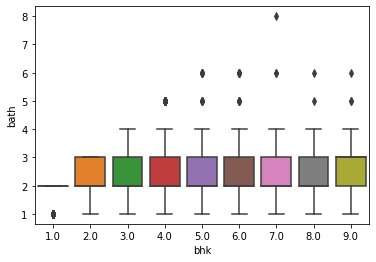

In [ ]:
sns.boxplot(x = 'bhk',y = 'bath',data=ban4)

In [ ]:
ban4['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '964', '300Sq. Yards', '6200'],
      dtype=object)

# **Removing Outliers**

In [ ]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [ ]:
ban4['total_sqft'].head(10)

0     1056
1     2600
2     1440
3     1521
4     1200
5     1170
8     1310
10    1800
12    1000
13    1100
Name: total_sqft, dtype: object

In [ ]:
def total_sq(x):
    splits = x.split('-')
    if len(splits) == 2:
        return (float(splits[0])+float(splits[1]))/2
    try:
        return float(x)
    except:
        return None

In [ ]:
ban4['total_sqft']= ban4['total_sqft'].apply(total_sq)
ban4 = ban4[ban4['total_sqft'].notnull()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ban4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10697 entries, 0 to 12709
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   10697 non-null  object 
 1   location    10697 non-null  object 
 2   size        10697 non-null  object 
 3   total_sqft  10697 non-null  float64
 4   bath        10697 non-null  float64
 5   balcony     10697 non-null  float64
 6   price       10697 non-null  float64
 7   bhk         10697 non-null  float64
dtypes: float64(5), object(3)
memory usage: 752.1+ KB


In [ ]:
ban4['price_per_sqft']= ban4['price']*100000/ban4['total_sqft']

In [ ]:
ban4.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2.0,4250.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


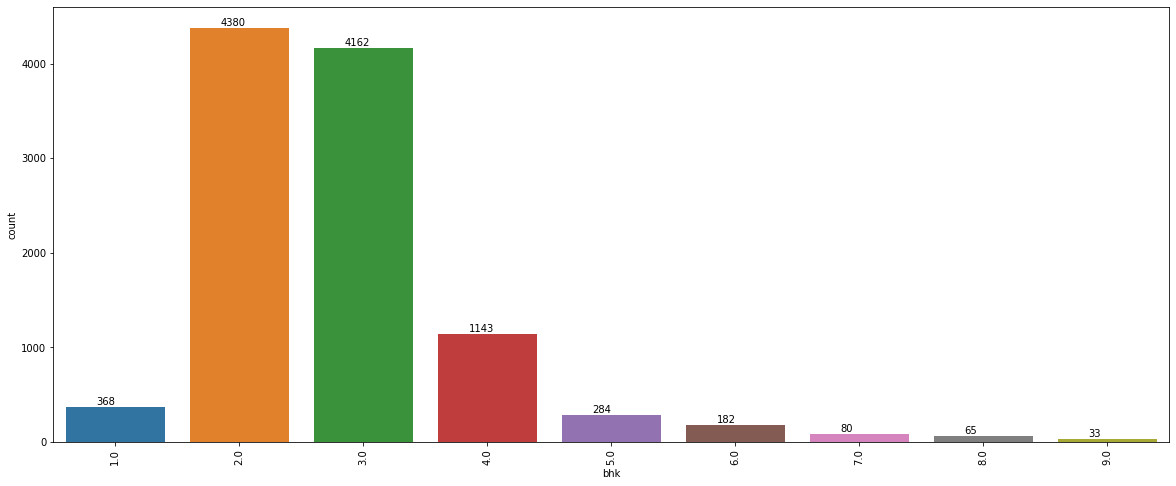

In [ ]:
plt.figure(figsize = (20,8))
ax=sns.countplot(ban4['bhk'])
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

Here, In some rows Area for per BHK is very small. so, dropped that row having total_sqft/bhk is less than 300)

In [ ]:
ban7= ban4.copy()
outlier = ban4[ban4.total_sqft/ban4.bhk<300]
outlier

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
19,Super built-up Area,Manayata Tech Park,2 BHK,1100.0,2.0,2.0,48.00,4.0,4363.636364
20,Built-up Area,Kengeri,1 BHK,600.0,1.0,1.0,15.00,3.0,2500.000000
24,Super built-up Area,Thanisandra,1 RK,510.0,1.0,0.0,25.25,3.0,4950.980392
26,Super built-up Area,Electronic City,2 BHK,660.0,1.0,1.0,23.10,3.0,3500.000000
48,Plot Area,KR Puram,2 Bedroom,800.0,1.0,1.0,130.00,3.0,16250.000000
...,...,...,...,...,...,...,...,...,...
12693,Super built-up Area,Vittasandra,2 BHK,1246.0,2.0,1.0,67.40,5.0,5409.309791
12694,Super built-up Area,Hosa Road,1 BHK,615.0,1.0,1.0,43.08,3.0,7004.878049
12696,Super built-up Area,Tirumanahalli,2 BHK,1260.0,2.0,1.0,55.00,5.0,4365.079365
12699,Super built-up Area,Yelahanka,1 BHK,602.0,2.0,1.0,30.00,3.0,4983.388704


In [ ]:
ban7.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2.0,4250.000000



# **Dropped Rows having locations frequency is low**
Here, I drpped those location which frqiuency in this dataset is less than 10. Because location are there in form of text when we apply one-hot encoding then the unique numbers of colums are very high. Then I Dropped those rows. 

In [ ]:
ban8 = ban7['location'].value_counts()
ban8

Whitefield                              411
Sarjapur  Road                          306
Electronic City                         281
Kanakpura Road                          244
Thanisandra                             205
                                       ... 
Rainbow Drive                             1
Shakthi Nagar                             1
Kalkere Channasandra                      1
Papareddipalya                            1
Kengeri Satellite Town KHB Apartment      1
Name: location, Length: 1138, dtype: int64

In [ ]:
ban9 = ban7.copy()

In [ ]:
ban7.location = ban7.location.apply(lambda x: x.strip())
location_stats = ban7['location'].value_counts(ascending=False)
location_stats

Whitefield                              412
Sarjapur  Road                          306
Electronic City                         283
Kanakpura Road                          244
Thanisandra                             208
                                       ... 
GB Palya                                  1
9th Block Jayanagar                       1
Lakkasandra                               1
Seethappa Layout                          1
Kengeri Satellite Town KHB Apartment      1
Name: location, Length: 1127, dtype: int64

In [ ]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Konanakunte                             10
BEML Layout                             10
Neeladri Nagar                          10
Cox Town                                10
Chamrajpet                              10
                                        ..
GB Palya                                 1
9th Block Jayanagar                      1
Lakkasandra                              1
Seethappa Layout                         1
Kengeri Satellite Town KHB Apartment     1
Name: location, Length: 927, dtype: int64

In [ ]:
ban7.location = ban7.location.apply(lambda x: 'Other' if x in location_stats_less_than_10 else x)
len(ban7.location.unique())

201

In [ ]:
ban7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10697 entries, 0 to 12709
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       10697 non-null  object 
 1   location        10697 non-null  object 
 2   size            10697 non-null  object 
 3   total_sqft      10697 non-null  float64
 4   bath            10697 non-null  float64
 5   balcony         10697 non-null  float64
 6   price           10697 non-null  float64
 7   bhk             10697 non-null  float64
 8   price_per_sqft  10697 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.1+ MB


In [ ]:
ban9 = ban7.copy()
outliers = ban7[ban7.total_sqft/ban7.bhk<300]
outliers

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
19,Super built-up Area,Other,2 BHK,1100.0,2.0,2.0,48.00,4.0,4363.636364
20,Built-up Area,Kengeri,1 BHK,600.0,1.0,1.0,15.00,3.0,2500.000000
24,Super built-up Area,Thanisandra,1 RK,510.0,1.0,0.0,25.25,3.0,4950.980392
26,Super built-up Area,Electronic City,2 BHK,660.0,1.0,1.0,23.10,3.0,3500.000000
48,Plot Area,KR Puram,2 Bedroom,800.0,1.0,1.0,130.00,3.0,16250.000000
...,...,...,...,...,...,...,...,...,...
12693,Super built-up Area,Vittasandra,2 BHK,1246.0,2.0,1.0,67.40,5.0,5409.309791
12694,Super built-up Area,Hosa Road,1 BHK,615.0,1.0,1.0,43.08,3.0,7004.878049
12696,Super built-up Area,Other,2 BHK,1260.0,2.0,1.0,55.00,5.0,4365.079365
12699,Super built-up Area,Yelahanka,1 BHK,602.0,2.0,1.0,30.00,3.0,4983.388704


In [ ]:
ban10

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Plot Area,Other,4 Bedroom,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...,...,...,...
12705,Super built-up Area,Kanakpura Road,3 BHK,1450.0,3.0,3.0,60.91,3.0,4200.689655
12706,Super built-up Area,Sarjapur Road,3 BHK,2089.0,3.0,2.0,148.00,5.0,7084.729536
12707,Super built-up Area,Haralur Road,3 BHK,1464.0,3.0,2.0,56.00,2.0,3825.136612
12708,Plot Area,Banashankari Stage VI,4 Bedroom,4800.0,3.0,2.0,200.00,4.0,4166.666667


# **Remove outliers from price variable**

In [ ]:
def outlier_removal(df):
    df_out = pd.DataFrame()
    for index, location_df in df.groupby('location'):
        m = np.mean(location_df['price_per_sqft'])
        s = np.std(location_df['price_per_sqft'])
        without_outlier = location_df[(location_df['price_per_sqft']>(m-s)) & (location_df['price_per_sqft']<(m+s))]
        df_out = pd.concat([df_out,without_outlier], ignore_index=True)
    return df_out

In [ ]:
ban10 = outlier_removal(ban9)
ban10.shape

(9095, 9)

In [ ]:
ban10.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,1st Phase JP Nagar,4 BHK,2825.0,4.0,3.0,250.0,3.0,8849.557522
1,Super built-up Area,1st Phase JP Nagar,3 BHK,1875.0,3.0,1.0,167.0,3.0,8906.666667
2,Super built-up Area,1st Phase JP Nagar,3 BHK,2059.0,3.0,2.0,225.0,2.0,10927.634774
3,Super built-up Area,1st Phase JP Nagar,2 BHK,1394.0,2.0,1.0,100.0,2.0,7173.601148
4,Super built-up Area,1st Phase JP Nagar,2 BHK,1077.0,2.0,2.0,93.0,2.0,8635.097493


In [ ]:
ban10.to_csv('cleaned bangaloredata.csv',index = None)

Text(0, 0.5, 'Count')

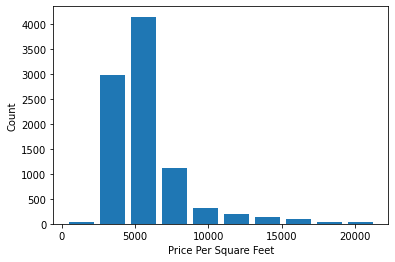

In [ ]:

plt.hist(ban10.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [ ]:
ban11 = ban10[ban10.bath<ban10.bhk+2]
ban11.shape

(9095, 9)

In [ ]:
ban11.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,1st Phase JP Nagar,4 BHK,2825.0,4.0,3.0,250.0,3.0,8849.557522
1,Super built-up Area,1st Phase JP Nagar,3 BHK,1875.0,3.0,1.0,167.0,3.0,8906.666667
2,Super built-up Area,1st Phase JP Nagar,3 BHK,2059.0,3.0,2.0,225.0,2.0,10927.634774
3,Super built-up Area,1st Phase JP Nagar,2 BHK,1394.0,2.0,1.0,100.0,2.0,7173.601148
4,Super built-up Area,1st Phase JP Nagar,2 BHK,1077.0,2.0,2.0,93.0,2.0,8635.097493


In [ ]:
ban11.drop(['size','price_per_sqft'],axis=1)

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,1st Phase JP Nagar,2825.0,4.0,3.0,250.00,3.0
1,Super built-up Area,1st Phase JP Nagar,1875.0,3.0,1.0,167.00,3.0
2,Super built-up Area,1st Phase JP Nagar,2059.0,3.0,2.0,225.00,2.0
3,Super built-up Area,1st Phase JP Nagar,1394.0,2.0,1.0,100.00,2.0
4,Super built-up Area,1st Phase JP Nagar,1077.0,2.0,2.0,93.00,2.0
...,...,...,...,...,...,...,...
9090,Super built-up Area,Yeshwanthpur,1195.0,2.0,2.0,100.00,3.0
9091,Super built-up Area,Yeshwanthpur,1692.0,3.0,3.0,108.00,3.0
9092,Super built-up Area,Yeshwanthpur,1169.0,2.0,2.0,64.08,3.0
9093,Super built-up Area,Yeshwanthpur,2500.0,3.0,3.0,138.00,3.0


# **One-hot Encoding**

In [ ]:
location = pd.get_dummies(ban11.location)
location

,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9090,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9093,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
ban11.location.value_counts()


Other               2464
Whitefield           410
Electronic City      269
Sarjapur  Road       253
Kanakpura Road       179
                    ... 
Giri Nagar             8
Kadubeesanahalli       7
Bannerghatta           7
Sompura                7
ITPL                   6
Name: location, Length: 201, dtype: int64

In [ ]:
ban11 = pd.concat([ban11,location],axis=1)

In [ ]:
ban11.head(20)

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft,1st Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,1st Phase JP Nagar,4 BHK,2825.0,4.0,3.0,250.0,3.0,8849.557522,1,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,1st Phase JP Nagar,3 BHK,1875.0,3.0,1.0,167.0,3.0,8906.666667,1,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,1st Phase JP Nagar,3 BHK,2059.0,3.0,2.0,225.0,2.0,10927.634774,1,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,1st Phase JP Nagar,2 BHK,1394.0,2.0,1.0,100.0,2.0,7173.601148,1,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,1st Phase JP Nagar,2 BHK,1077.0,2.0,2.0,93.0,2.0,8635.097493,1,...,0,0,0,0,0,0,0,0,0,0
5,Plot Area,1st Phase JP Nagar,2 Bedroom,1566.0,2.0,0.0,180.0,3.0,11494.252874,1,...,0,0,0,0,0,0,0,0,0,0
6,Built-up Area,1st Phase JP Nagar,1 BHK,840.0,2.0,2.0,50.0,2.0,5952.380952,1,...,0,0,0,0,0,0,0,0,0,0
7,Super built-up Area,1st Phase JP Nagar,3 BHK,1590.0,3.0,3.0,131.0,3.0,8238.993711,1,...,0,0,0,0,0,0,0,0,0,0
8,Super built-up Area,1st Phase JP Nagar,2 BHK,1180.0,2.0,2.0,88.5,3.0,7500.000000,1,...,0,0,0,0,0,0,0,0,0,0
9,Built-up Area,1st Phase JP Nagar,2 BHK,1394.0,2.0,2.0,85.0,3.0,6097.560976,1,...,0,0,0,0,0,0,0,0,0,0


# **Data Splition and data modelling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
ban11= ban11.drop(['location'],axis = 1)

In [ ]:
ban11= ban11.drop(['size'],axis = 1)

In [ ]:
ban11.head()

,area_type,total_sqft,bath,balcony,price,bhk,price_per_sqft,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,2825.0,4.0,3.0,250.0,3.0,8849.557522,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,1875.0,3.0,1.0,167.0,3.0,8906.666667,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,2059.0,3.0,2.0,225.0,2.0,10927.634774,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,1394.0,2.0,1.0,100.0,2.0,7173.601148,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,1077.0,2.0,2.0,93.0,2.0,8635.097493,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = ban11.drop(['price','area_type','price_per_sqft'],axis=1)
Y = ban11['price']

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(X,Y, test_size=0.3,random_state=1)

# **Linear Regression Model**

In [ ]:
model = LinearRegression() 
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.score(x_test,y_test)

0.5591613471462309

In [ ]:
model.score(x_train,y_train)
  
  

0.49473898270041616

In [ ]:
model.coef_

array([ 2.99021892e-02,  3.28009082e+01, -3.34472846e+00,  7.33510952e-01,
        5.22135534e+01,  7.86556675e+01, -7.23417374e+00,  1.74818157e+01,
        7.45768080e+00, -1.28775756e+01, -1.33403960e+01, -1.00877439e+01,
       -2.30918520e+01, -7.58217270e+00,  8.10666040e+00,  1.80545620e+00,
       -9.55374309e+00, -2.23684672e+01, -2.85060729e+01, -1.37862182e+01,
       -2.07612798e+01, -1.59664515e+01, -3.61101817e+00, -1.09837748e+01,
        9.58520064e+00, -5.06584724e-01, -2.44077236e+01,  8.76815590e+00,
        9.84114182e+00, -7.03240930e+00,  1.25211284e+02, -4.70132454e-01,
       -2.65271161e+01, -4.91560274e+00, -2.04502117e+01, -5.95466776e+00,
        8.43099633e+01,  1.66579195e+01, -1.16086225e+01, -1.51466333e+01,
       -2.24055649e+01, -7.59444034e+00, -6.79091050e+00,  6.11261364e+00,
        3.29820875e+01, -2.09512823e+01, -1.29531027e+01, -2.77674282e+01,
       -3.16246359e+01,  2.78671654e+01, -1.21969506e+00, -1.22079616e+01,
       -3.90431880e+00, -

In [ ]:
model.intercept_

-33.32059358065334

In [ ]:
y1 = model.predict(x_test)

In [ ]:
print(y1)

[115.21896958  44.66643448  84.62218989 ...  72.28444111  75.2970236
  57.71451578]


Decision Tree Regressor and Ensemble model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model1 = DecisionTreeRegressor(random_state=100,max_depth=10,min_samples_leaf=5)

In [ ]:
model1.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, random_state=100)

In [ ]:
model1.score(x_train,y_train)

0.7621799719394932

In [ ]:
model1.score(x_test,y_test)

0.626334358666117

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import BaggingRegressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model6= GradientBoostingRegressor(random_state=100,learning_rate=0.1)

In [ ]:
model6.fit(x_train,y_train)

GradientBoostingRegressor(random_state=100)

In [ ]:
model6.score(x_test,y_test)

0.6955881722055468

In [ ]:
model5= AdaBoostRegressor(random_state=100,learning_rate=0.1)

In [ ]:
model5.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.1, random_state=100)

In [ ]:
model5.score(x_test,y_test)

0.5928935581279253

In [ ]:
model4= BaggingRegressor(random_state=100,max_samples=1)

In [ ]:
model4.fit(x_train,y_train)

BaggingRegressor(max_samples=1, random_state=100)

In [ ]:
model.score(x_test,y_test)

0.5591613471462309

In [ ]:
model2= RandomForestRegressor(random_state=100,max_depth=5)

In [ ]:
model2.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, random_state=100)

In [ ]:
model2.score(x_test,y_test)

0.6699050270756692

In [ ]:
model3= xgb.XGBRegressor(random_state=100, learning_rate=0.1,max_depth=5)

In [ ]:
model3.fit(x_train,y_train)

[09:43:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=5, random_state=100)

In [ ]:
model3.score(x_test,y_test)

0.6886304347025154